# Actuarial MFE Predictive Analytics - EDA & Baseline

Welcome! This notebook contains exploratory data analysis (EDA), early insights, and preparation for modeling the Kaggle [Actuarial MFE Predictive Analytics](https://www.kaggle.com/competitions/actuarial-program-mfe-predictive-analytics) competition.

We’ll go step-by-step:
1. Understand the dataset and goal
2. Explore features and distributions
3. Identify insights and red flags
4. Prepare data for modeling and visualization


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Streamlined visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

# Load data
train = pd.read_csv('../data/train.csv')
sample = pd.read_csv('../data/sample.csv')
test = pd.read_csv('../data/test.csv', sep=';')


train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [ ]:
# Shape
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Columns
print("Train columns:", train.columns.tolist())

# Data types and nulls
train.info()


In [ ]:
# Basic distribution of the target variable
sns.histplot(train['target_column_name'], kde=True)
plt.title('Target Distribution')

In [23]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

seats        411
torque       160
mileage      159
engine       159
max_power    154
dtype: int64

In [ ]:
print(train.columns.tolist())

['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


In [47]:
#Clean mixed data types
train['mileage'] = train['mileage'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
train['engine'] = train['engine'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
train['max_power'] = train['max_power'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
train['torque'] = train['torque'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

#Extract and bin columns, convert categorical columns into encodable format
train['brand'] = train['name'].str.split().str[0]

CURRENT_YEAR = 2025  
train['car_age'] = CURRENT_YEAR - train['year']

train['is_automatic'] = (train['transmission'] == 'Automatic').astype(int)

owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}
train['owner_encoded'] = train['owner'].map(owner_mapping)

train[['brand', 'car_age', 'is_automatic', 'owner', 'owner_encoded']].head()



,brand,car_age,is_automatic,owner,owner_encoded
0,Tata,7,0,First Owner,1
1,Hyundai,7,0,First Owner,1
2,Toyota,10,1,Second Owner,2
3,Hyundai,10,0,First Owner,1
4,Volvo,6,1,First Owner,1


In [48]:
train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_age,is_automatic,owner_encoded
count,6000,6000.000000,6.000000e+03,6.000000e+03,6000,6000,6000,6000,5841.000000,5841.000000,5845.000000,5840.000000,5589.000000,6000,6000.000000,6000.000000,6000.000000
unique,1801,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Maruti,NaN,NaN,NaN
freq,90,NaN,NaN,NaN,3265,5006,5228,3904,NaN,NaN,NaN,NaN,NaN,1792,NaN,NaN,NaN
mean,NaN,2013.814833,6.387764e+05,6.997216e+04,NaN,NaN,NaN,NaN,19.388137,1464.356959,91.585197,169.304969,5.435856,NaN,11.185167,0.128667,1.456333
std,NaN,4.026733,8.066632e+05,5.188961e+04,NaN,NaN,NaN,NaN,4.055342,508.319157,35.982689,98.035812,0.975015,NaN,4.026733,0.334859,0.711930
min,NaN,1983.000000,3.000000e+04,1.000000e+03,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,4.800000,2.000000,NaN,5.000000,0.000000,0.000000
25%,NaN,2011.000000,2.557498e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,68.050000,102.000000,5.000000,NaN,8.000000,0.000000,1.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,82.000000,160.000000,5.000000,NaN,10.000000,0.000000,1.000000
75%,NaN,2017.000000,6.750000e+05,9.900000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,102.000000,205.000000,5.000000,NaN,14.000000,0.000000,2.000000


Text(0.5, 1.0, 'Correlation Heatmap')

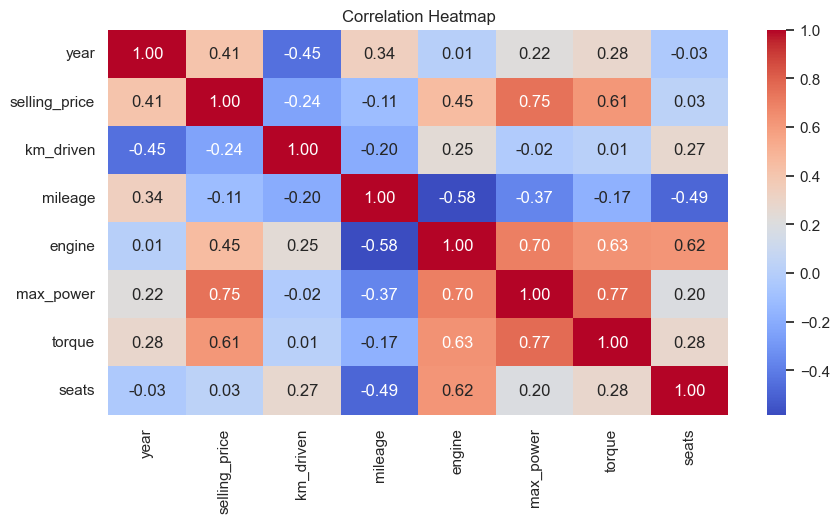

In [39]:
corr = train.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

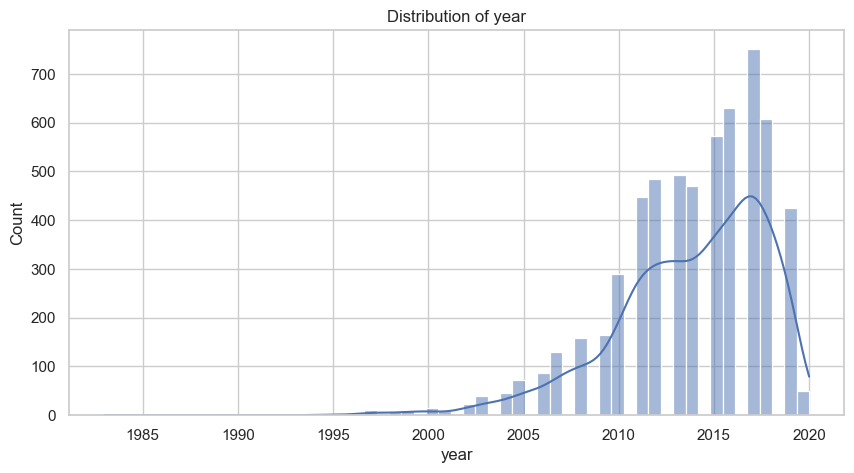

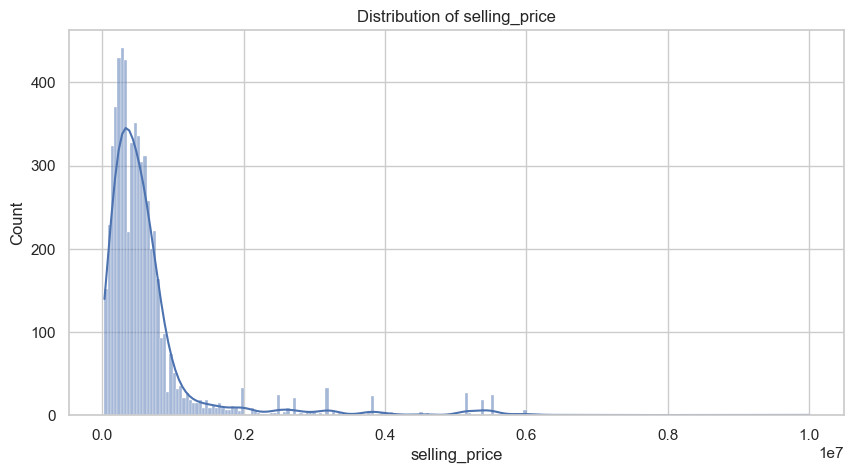

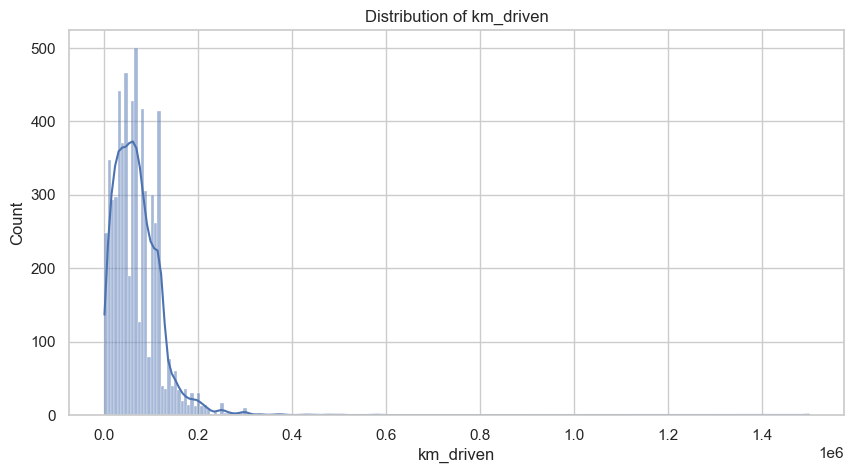

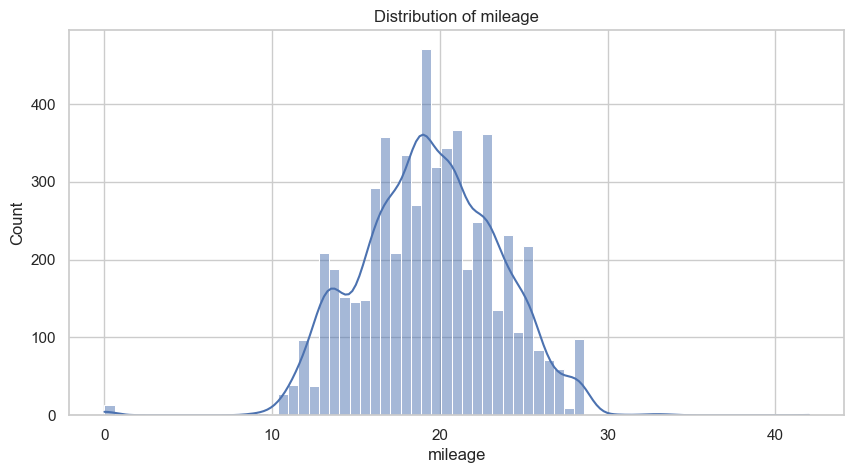

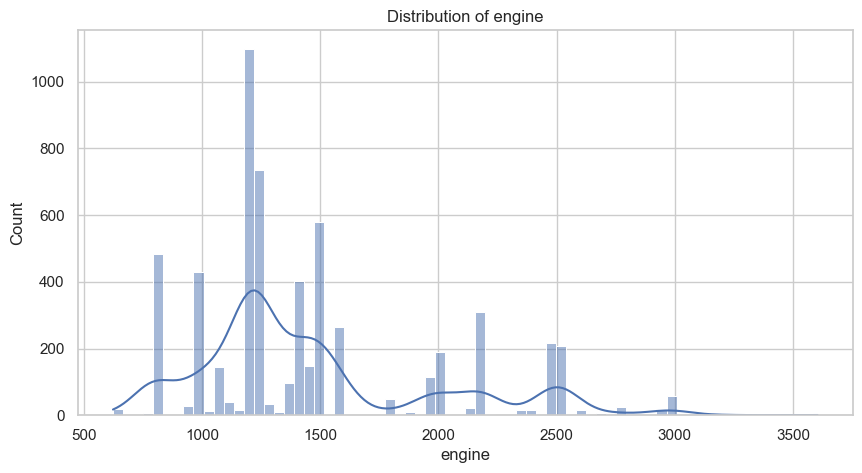

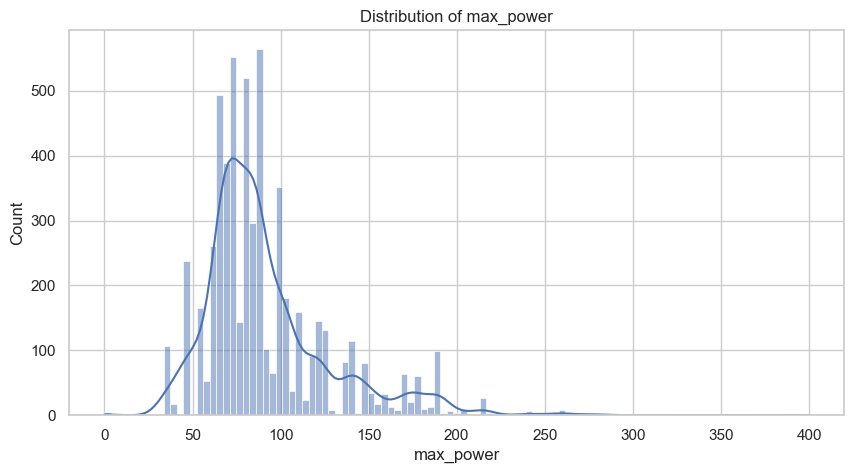

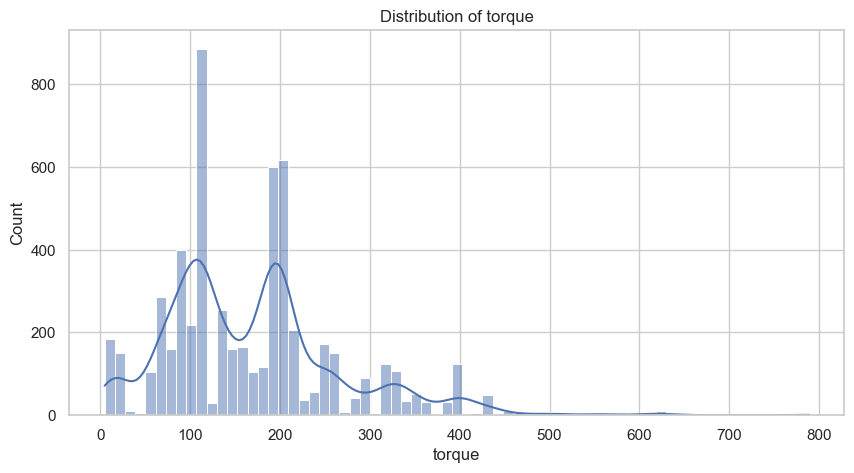

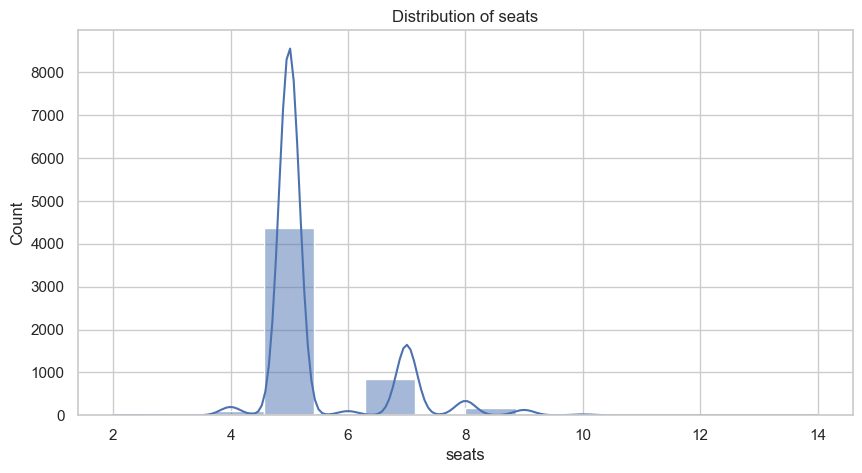

In [43]:
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    if col != 'target_column_name':  # Skip target
        sns.histplot(train[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

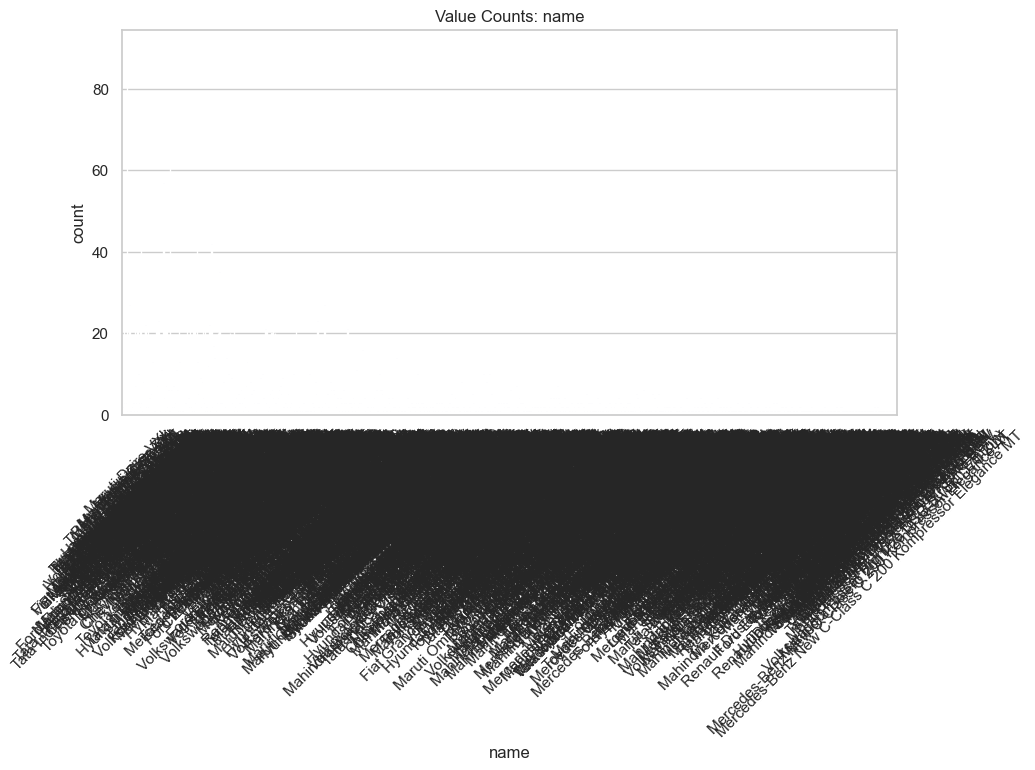

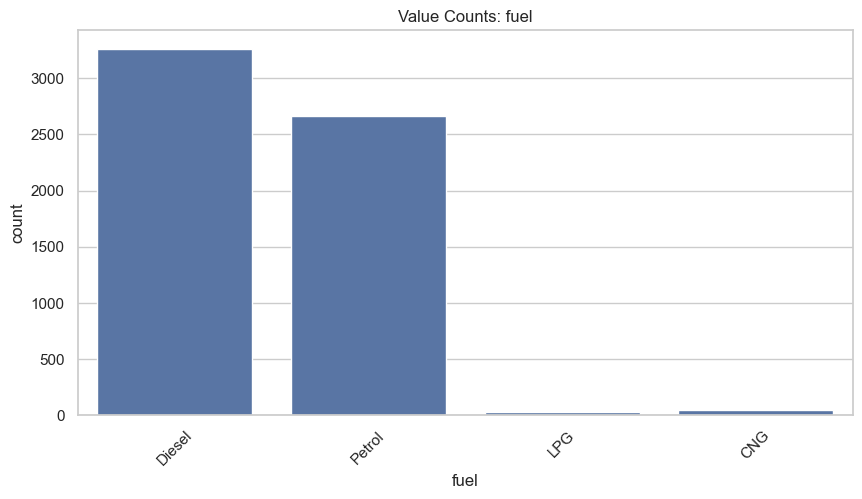

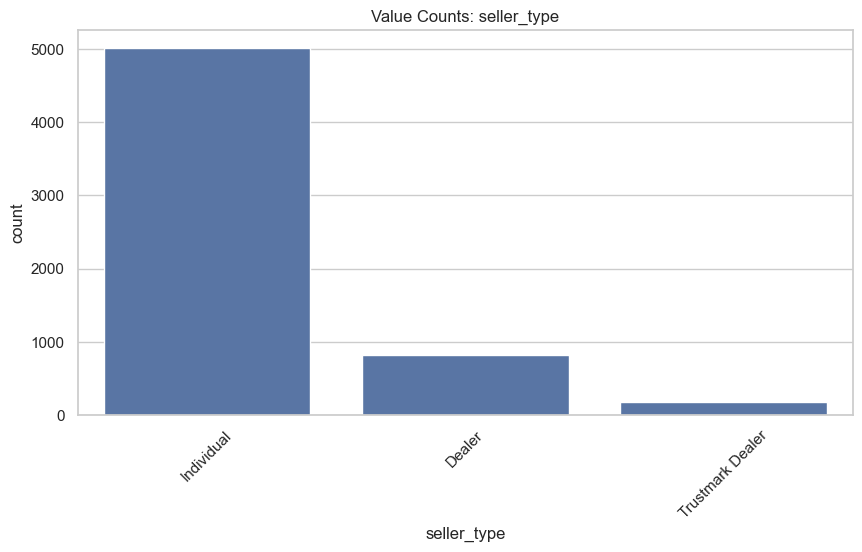

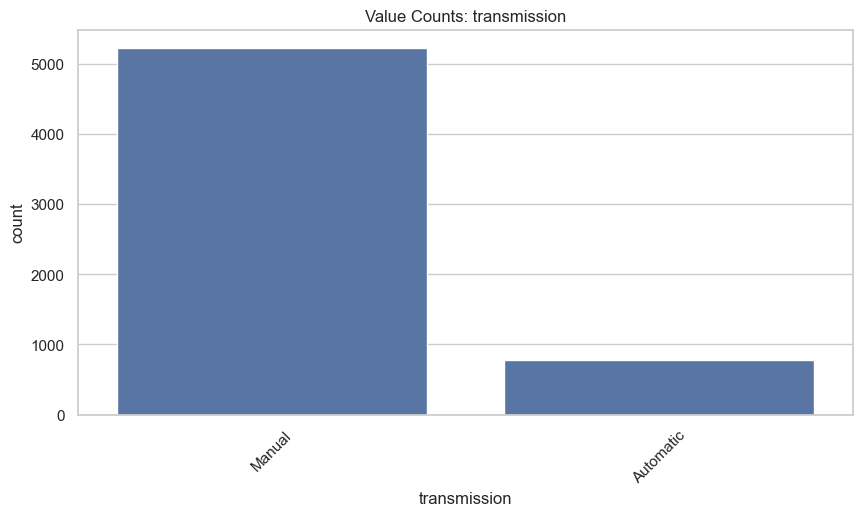

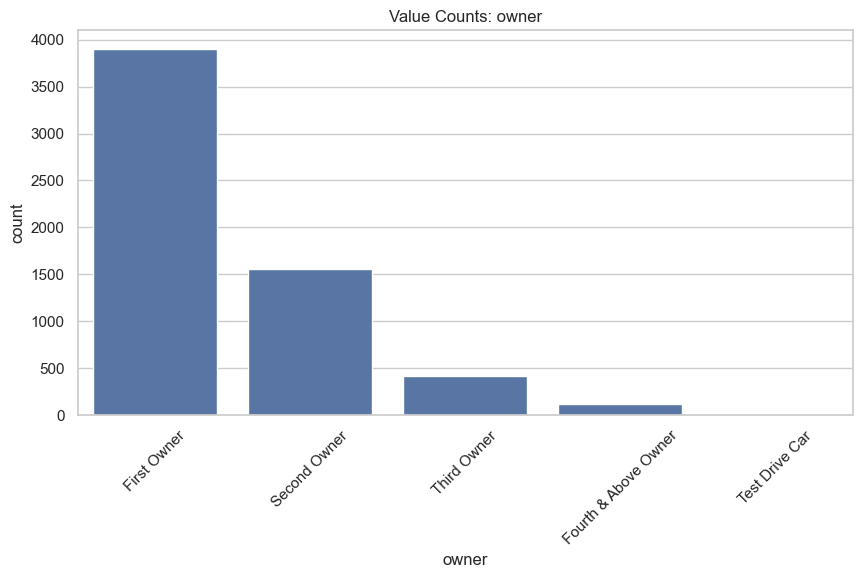

In [44]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
cat_cols = train.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Value Counts: {col}')
    plt.xticks(rotation=45)
    plt.show()

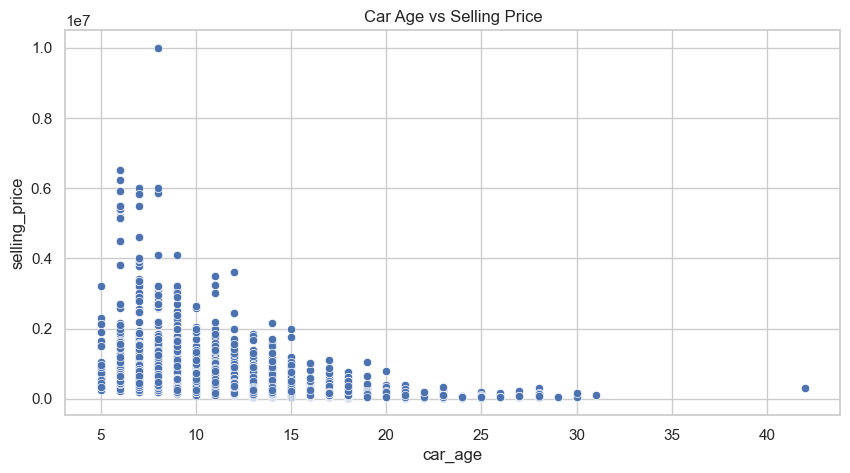

In [49]:
# Car Age vs Selling Price 
sns.scatterplot(data=train, x='car_age', y='selling_price')
plt.title('Car Age vs Selling Price')
plt.show()

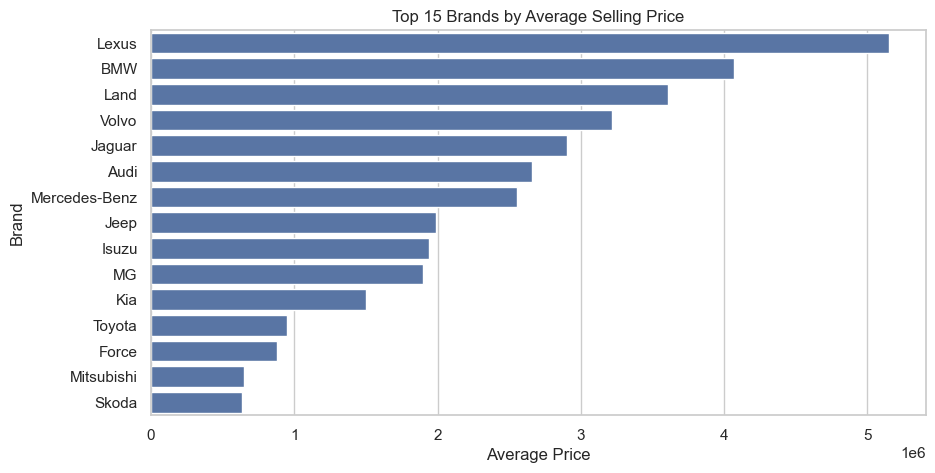

In [50]:
# Brand vs Average Price
avg_price_by_brand = train.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(15)

sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index)
plt.title('Top 15 Brands by Average Selling Price')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()


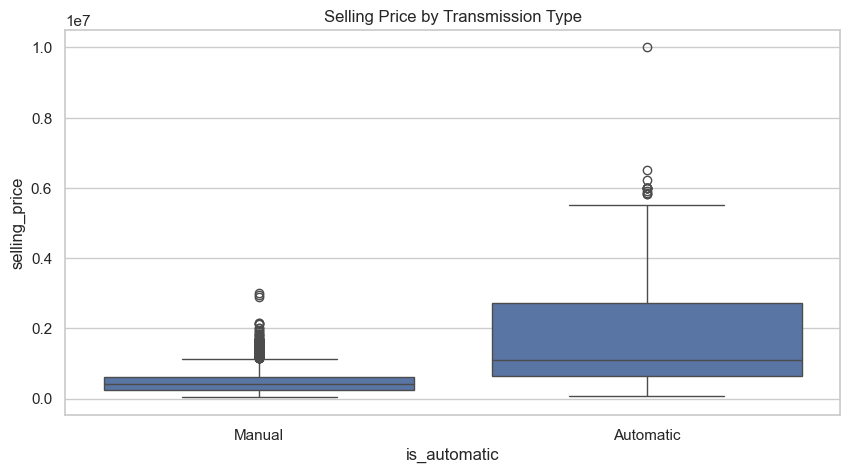

In [51]:
# Transmission Type Impact
sns.boxplot(data=train, x='is_automatic', y='selling_price')
plt.xticks([0, 1], ['Manual', 'Automatic'])
plt.title('Selling Price by Transmission Type')
plt.show()


In [ ]:
# Define target and features
target = 'selling_price'

features = [
    'car_age',
    'km_driven',
    'mileage',
    'engine',
    'max_power',
    'torque',
    'seats',
    'is_automatic',
    'owner_encoded',
    'fuel',
    'seller_type',
    'brand'
]

# One-hot encode and avoid dummy variable trap
train_encoded = pd.get_dummies(train[features], drop_first=True)

# Final feature set
X = train_encoded
y = train[target]



from sklearn.impute import SimpleImputer

# Recreate dummy variables (just to be sure)
X = pd.get_dummies(train[features], drop_first=True)

# Apply mean imputation to all numeric columns
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check again
print("Missing values after imputation:", X_imputed.isnull().sum().sum())


Missing values after imputation: 0


In [69]:
X_imputed.isnull().sum().sum()

np.int64(0)

In [70]:
X.dtypes.value_counts()

bool       36
float64     5
int64       4
Name: count, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

#Training Model
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluate Model & Feature Importance

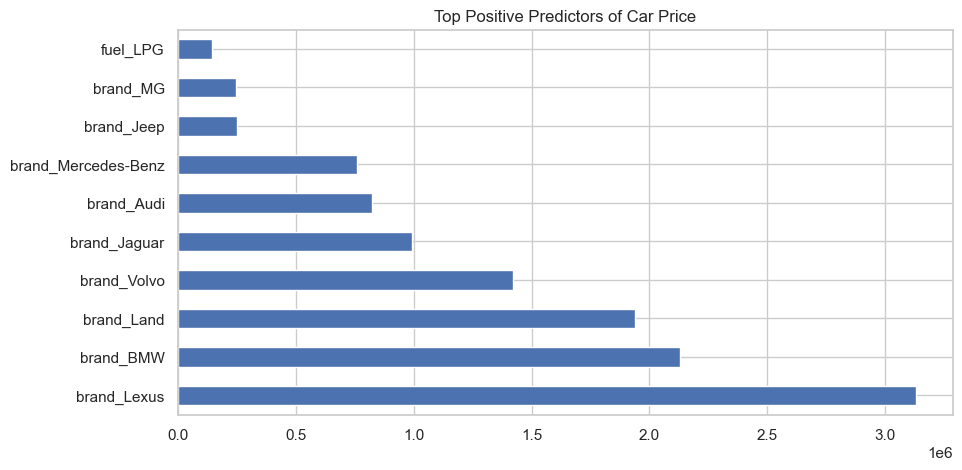

In [77]:
importance = pd.Series(model.coef_, index=X_train.columns)
importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top Positive Predictors of Car Price")
plt.show()

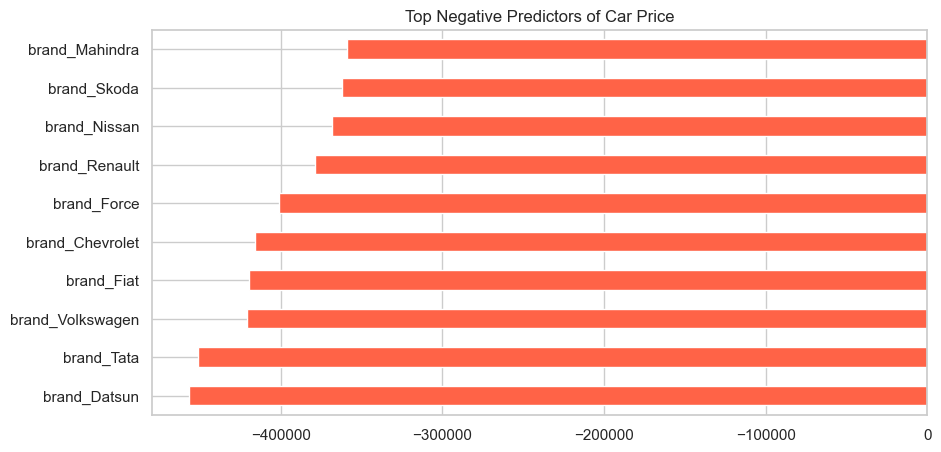

In [78]:
importance.sort_values(ascending=True).head(10).plot(kind='barh', color='tomato')
plt.title("Top Negative Predictors of Car Price")
plt.show()


## Observations & Initial Insights

- Target variable is skewed/balanced? (interpret plot)
- Feature X shows a strong relationship with Y
- Missing values in columns: A, B, C
- Possible outliers in feature Z

## Ideas for Feature Engineering

- Create new columns from dates/times (e.g. day of week, hour)
- Combine or bucket numeric features
- Encode categorical features


In [ ]:
# Dataset checkpoint with changes
train.to_csv("../data/train_clean.csv", index=False)